### Exercise 8.3: The Lorenz equations

One of the most celebrated sets of differential equations in physics is the Lorenz equations:
$$ \frac{dx}{dt}=\sigma(y-x), \qquad \frac{dy}{dt}=rx-y-xz, \qquad \frac{dz}{dt}=xy-bz $$
where $\sigma$, $r$, and $b$ are constants. These equations were first studied by Edward Lorenz in 1963, who derived them from a simplified model of weather patterns. The reason for their fame is that they were one of the first incontrovertible examples of *deterministic chaos*, the occurrence of apparently random motion even though there is no randomness built into the equations.

<div class="alert alert-block alert-info">
Write a program to solve the Lorenz equations for the case $\sigma=10$, $r=28$, and $b=\frac{8}{3}$ in the range from $t=0$ to $t=50$ with initial conditions $(x,y,z)=(0,1,0)$. Have your program make a plot of $y$ as a function of time.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams["figure.dpi"] = 75

In [2]:
# Use this as guide!
def fourthOrder_RK(a, b, N, x0):
    h = (b-a)/N
    tpoints = np.linspace(a, b, N)
    xpoints = [x0]
    for t in np.arange(0, N-1, 1):
        k1 = h*f(xpoints[t], tpoints[t])
        k2 = h*f(xpoints[t] + 0.5*k1, tpoints[t] + 0.5*h)
        k3 = h*f(xpoints[t] + 0.5*k2, tpoints[t] + 0.5*h)
        k4 = h*f(xpoints[t]*k3, tpoints[t] + h)
        xpoints.append(xpoints[t] + (k1+2*k2+2*k3+k4)/6)
    return np.stack((tpoints, xpoints), axis = -1) # Check numpy documentation for this

def lorenzeqn(r):
    x, y, z = r, r, r
    sigma, rho, beta = 10, 28, 8/3
    fx = sigma*(y - x)
    fy = rho*x - y - x*z
    fz = x*y - beta*z
    return np.array([fx, fy, fz], int)

I devised my own code here for coupled ODE. The code proper starts here for reference.

In [3]:
sigma, rho, beta = 10, 28, 8/3

def xt(x, y, z, t):
    fx = sigma*(y - x)
    return fx

def yt(x, y, z, t):
    fy = rho*x - y - x*z
    return fy

def zt(x, y, z, t):
    fz = x*y - beta*z
    return fz

In [4]:
def RK4_solver(xt, yt, zt, a, b, N, initial_cond):
    h = (b-a)/N
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    z = np.zeros(N+1)
    t = np.zeros(N+1)
    x[0], y[0], z[0], t[0] = initial_cond[0], initial_cond[1], initial_cond[2], 0
    
    for k in range(N):
        t[k+1] = t[k] + h
        
        k1x = xt(x[k], y[k], z[k], t[k])
        k1y = yt(x[k], y[k], z[k], t[k])
        k1z = zt(x[k], y[k], z[k], t[k])
        
        k2x = xt((x[k] + 0.5*k1x*h), (y[k] + 0.5*k1y*h), (z[k] + 0.5*k1z*h), (t[k] + 0.5*h))
        k2y = yt((x[k] + 0.5*k1x*h), (y[k] + 0.5*k1y*h), (z[k] + 0.5*k1z*h), (t[k] + 0.5*h))
        k2z = zt((x[k] + 0.5*k1x*h), (y[k] + 0.5*k1y*h), (z[k] + 0.5*k1z*h), (t[k] + 0.5*h))
        
        k3x = xt((x[k] + 0.5*k2x*h), (y[k] + 0.5*k2y*h), (z[k] + 0.5*k2z*h), (t[k] + 0.5*h))
        k3y = yt((x[k] + 0.5*k2x*h), (y[k] + 0.5*k2y*h), (z[k] + 0.5*k2z*h), (t[k] + 0.5*h))
        k3z = zt((x[k] + 0.5*k2x*h), (y[k] + 0.5*k2y*h), (z[k] + 0.5*k2z*h), (t[k] + 0.5*h))
        
        k4x = xt((x[k] + k3x*h), (y[k] + k3y*h), (z[k] + k3z*h), (t[k] + h))
        k4y = yt((x[k] + k3x*h), (y[k] + k3y*h), (z[k] + k3z*h), (t[k] + h))
        k4z = zt((x[k] + k3x*h), (y[k] + k3y*h), (z[k] + k3z*h), (t[k] + h))
        
        x[k+1] = x[k] + h*(k1x + 2*k2x + 2*k3x + k4x)/6
        y[k+1] = y[k] + h*(k1y + 2*k2y + 2*k3y + k4y)/6
        z[k+1] = z[k] + h*(k1z + 2*k2z + 2*k3z + k4z)/6
        
    return x, y, z, t

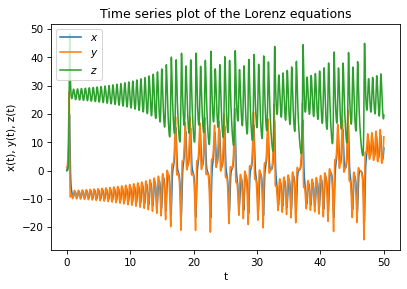

In [5]:
initial_cond = [0, 1, 0]
x, y, z, t = RK4_solver(xt, yt, zt, 0, 50, 10000, initial_cond)

# Time series plot of the coupled ODE
plt.plot(t, x, label = r"$x$")
plt.plot(t, y, label = r"$y$")
plt.plot(t, z, label = r"$z$")
plt.legend()
plt.xlabel(r"t")
plt.ylabel(r"x(t), y(t), z(t)")
plt.title("Time series plot of the Lorenz equations")
plt.savefig("lorenz time series.png", dpi = 1000)

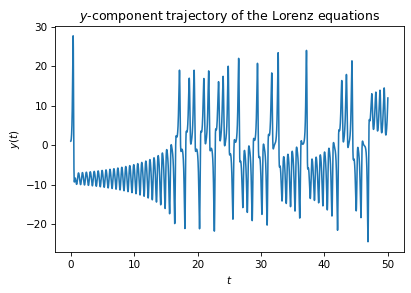

In [6]:
# 2D Lorenz attractor of dydt as function of time
plt.plot(t, y)
plt.xlabel(r"$t$")
plt.ylabel(r"$y(t)$")
plt.title("$y$-component trajectory of the Lorenz equations")
plt.savefig("lorenz dydt", dpi = 1000)

<div class="alert alert-block alert-info">
Modify your program to produce a plot of $z$ against $x$. You should see a picture of the famous "strange attractor" of the Lorenz equations, a lop-sided butterflyshaped plot that never repeats itself.
</div>

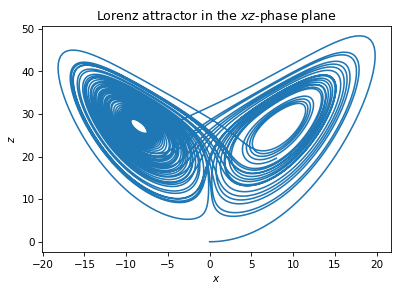

In [7]:
plt.plot(x, z)
plt.xlabel(r"$x$")
plt.ylabel(r"$z$")
plt.title("Lorenz attractor in the $xz$-phase plane")
plt.savefig("lorenz 2d", dpi = 1000)

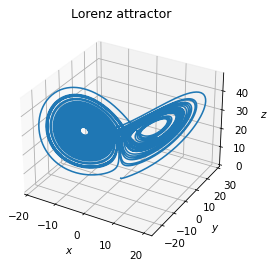

In [8]:
# 3D Lorenz attractor
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.plot3D(x, y, z)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")
ax.set_title("Lorenz attractor")
plt.savefig("lorenz 3d", dpi = 1000)

### Exercise 8.6: Harmonic and anharmonic oscillators

The simple harmonic oscillator arises in many physical problems, in mechanics, electricity and magnetism, and condensed matter physics, among other area. Consider the standard oscillator equation

$$ \frac{d^2x}{dt^2} = -\omega^2x $$

<div class="alert alert-block alert-info">
Solve the case for $\omega=1$ in the range from $t=0$ to $t=50$. Use $x=1$ and $\frac{dx}{dt}=0$ as initial conditions. Plot the value of $x$ as a function of time.
</div>

Note that the second-order ODE can be reduced to a coupled first-order equations. From Math 122, we can verify that the ODE above reduces to
$$ \frac{dx}{dt} = v, \quad \frac{dv}{dt} = -\omega^2x$$

In [9]:
def harmonic_osc(t, r):
    v, x = r[0], r[1]
    fv, fx = -(omega**2)*x, v
    return np.array([fv, fx])

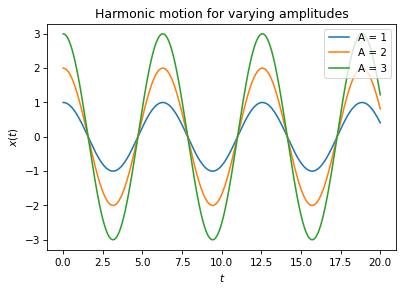

In [10]:
# Initializing the conditions and using the solve_ivp from scipy library
omega = 1
time_range = (0, 20)
amplitudes = [1, 2, 3]

for x in amplitudes:
    v = 0
    harmonic_soln = solve_ivp(harmonic_osc, time_range, [v, x], method = "RK45", max_step = 0.005)
    plt.plot(harmonic_soln.t, harmonic_soln.y[1], label = "A = {}".format(x))

plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")
plt.title("Harmonic motion for varying amplitudes")
plt.legend(loc = 1)
plt.savefig("harmonic oscillator.png", dpi = 1000)

<div class="alert alert-block alert-info">
Modify your program to solve for the motion of the anharmonic oscillator described by the equation
$$ \frac{d^2x}{dt^2} = -\omega^2x^3 $$
Use the same initial conditions for the harmonic oscillator and plot its motion.
</div>

In [11]:
def anharmonic_osc(t, r):
    v, x = r[0], r[1]
    fv, fx = -(omega**2)*x**3, v
    return np.array([fv, fx])

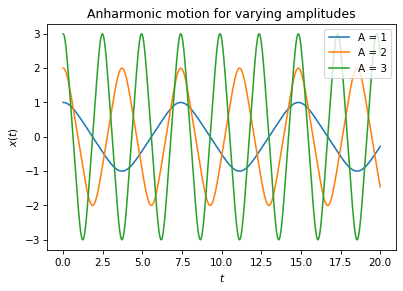

In [12]:
omega = 1
time_range = (0, 20)
amplitudes = [1, 2, 3]

for x in amplitudes:
    v = 0
    anharmonic_soln = solve_ivp(anharmonic_osc, time_range, [v, x], method = "RK45", max_step = 0.005)
    plt.plot(anharmonic_soln.t, anharmonic_soln.y[1], label = "A = {}".format(x))
    
plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")
plt.title("Anharmonic motion for varying amplitudes")
plt.legend(loc = 1)
plt.savefig("anharmonic oscillator.png", dpi = 1000)

<div class="alert alert-block alert-info">
Make the phase-space plot of the harmonic and anharmonic oscillator, i.e. the plot of the velocity of the oscillator against its position in time.
</div>

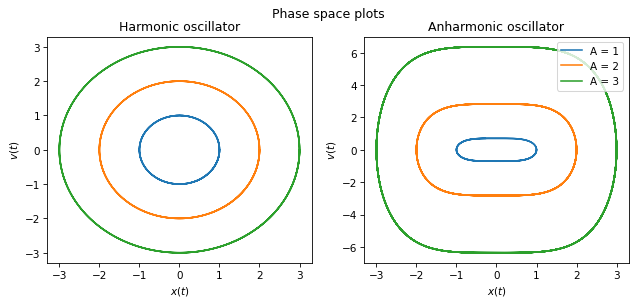

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

for x in amplitudes:
    v = 0
    harmonic_soln = solve_ivp(harmonic_osc, time_range, [v, x], method = "RK45", max_step = 0.005)
    anharmonic_soln = solve_ivp(anharmonic_osc, time_range, [v, x], method = "RK45", max_step = 0.005)
    ax[0].plot(harmonic_soln.y[1], harmonic_soln.y[0], label = ("A = {}".format(x)))
    ax[1].plot(anharmonic_soln.y[1], anharmonic_soln.y[0], label = ("A = {}".format(x)))
    
    ax[0].set_xlabel(r"$x(t)$")
    ax[0].set_ylabel(r"$v(t)$")
    ax[0].title.set_text("Harmonic oscillator")
    
    ax[1].set_xlabel(r"$x(t)$")
    ax[1].set_ylabel(r"$v(t)$")
    ax[1].title.set_text("Anharmonic oscillator")

fig.suptitle("Phase space plots")
plt.legend()   
plt.savefig("phase space plots.png", dpi = 1000)

<div class="alert alert-block alert-info">
The van der Pol oscillator, which appears in electronic circuits and in laser physics, is described by the equation

$$ \frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} + \omega^2x = 0 $$
    
Modify your program to solve this equation from $t=0$ to $t=20$ and hence make a phase space plot for this oscillator with $\omega=1$, $\mu=1$, and initial conditions $x=1$ and $\frac{dx}{dt}=0$. Consider also the case for $\mu=2$ and $\mu=4$.
</div>

In [14]:
def vanderpol_osc(t, r):
    v, x = r[0], r[1]
    fv, fx = mu*(1-x**2)*v - (omega**2)*x, v
    return np.array([fv, fx])

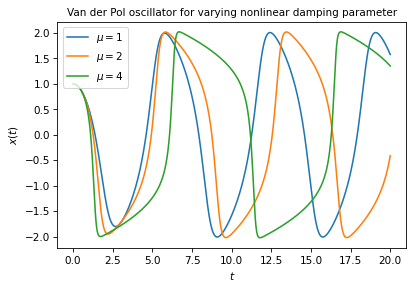

In [15]:
omega = 1
x, v = 1, 0
time_range = (0, 20)
mu_values = [1, 2, 4]

for mu in mu_values:
    vanderpol_soln = solve_ivp(vanderpol_osc, time_range, [v, x], method = "RK45", max_step = 0.005)
    plt.plot(vanderpol_soln.t, vanderpol_soln.y[1], label = r"$\mu = {}$".format(mu))

plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")
plt.title("Van der Pol oscillator for varying nonlinear damping parameter", fontsize = 10)
plt.legend(loc = 2)
plt.savefig("van der pol oscillator.png", dpi = 1000)

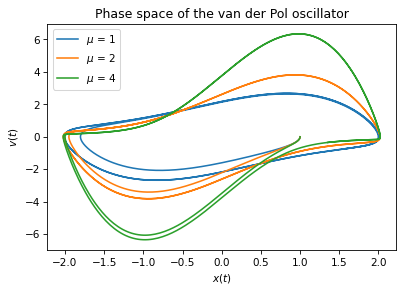

In [16]:
for mu in mu_values:
    vanderpol_soln = solve_ivp(vanderpol_osc, time_range, [v, x], method = "RK45", max_step = 0.005)
    plt.plot(vanderpol_soln.y[1], vanderpol_soln.y[0], label = r"$\mu$ = {}".format(mu))
    
plt.xlabel(r"$x(t)$")
plt.ylabel(r"$v(t)$")
plt.title("Phase space of the van der Pol oscillator")
plt.legend(loc = 2)
plt.savefig("van der pol phase space.png", dpi = 1000)